In [188]:
"""
author: EdgardoCS @FSU Jena
date: 08.05.2025
"""

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma.core import zeros
from scipy.ndimage import label

pd.options.mode.chained_assignment = None


In [189]:
df = pd.read_excel("source/only_couples_data.xlsx")
index_options = {"0x": 0,
                 "1-5x": 1,
                 "6-10x": 2,
                 "11-20x": 3,
                 "21-50x": 4,
                 "> 50x": 5}

rel_options = {"0 - Not at all satisfied": 0,
               1: 1,
               2: 2,
               3: 3,
               4: 4,
               5: 5,
               6: 6,
               7: 7,
               8: 8,
               9: 9,
               "10 - Completely satisfied": 10}

df["kiss_diff"] = None
df["hold_diff"] = None
df["hug_diff"] = None

for i in range(0, len(df)):
    try:
        df.loc[i, "relsat"] = rel_options[df["relsat"][i]]
    except KeyError as err:
        pass

In [190]:
for i in range(0, len(df)):
    # print(i, index_options[df['ptf_kiss'][i]] - index_options[df['tf_kiss'][i]])
    if index_options[df['tf_kiss'][i]] == index_options[df['ptf_kiss'][i]]:
        df.loc[i, "kiss_diff"] = 0
    if index_options[df['tf_kiss'][i]] > index_options[df['ptf_kiss'][i]]:
        df.loc[i, "kiss_diff"] = 1
    if (index_options[df['tf_kiss'][i]] - index_options[df['ptf_kiss'][i]]) > 2:
        df.loc[i, "kiss_diff"] = 2
    if index_options[df['tf_kiss'][i]] < index_options[df['ptf_kiss'][i]]:
        df.loc[i, "kiss_diff"] = -1
    if (index_options[df['ptf_kiss'][i]] - index_options[df['tf_kiss'][i]]) > 2:
        df.loc[i, "kiss_diff"] = -2

    if index_options[df['tf_hold'][i]] == index_options[df['ptf_hold'][i]]:
        df.loc[i, "hold_diff"] = 0
    if index_options[df['tf_hold'][i]] > index_options[df['ptf_hold'][i]]:
        df.loc[i, "hold_diff"] = 1
    if (index_options[df['tf_hold'][i]] - index_options[df['ptf_hold'][i]]) > 2:
        df.loc[i, "hold_diff"] = 2
    if index_options[df['tf_hold'][i]] < index_options[df['ptf_hold'][i]]:
        df.loc[i, "hold_diff"] = -1
    if (index_options[df['ptf_hold'][i]] - index_options[df['tf_hold'][i]]) > 2:
        df.loc[i, "hold_diff"] = -2

    if index_options[df['tf_hug'][i]] == index_options[df['ptf_hug'][i]]:
        df.loc[i, "hug_diff"] = 0
    if index_options[df['tf_hug'][i]] > index_options[df['ptf_hug'][i]]:
        df.loc[i, "hug_diff"] = 1
    if (index_options[df['tf_hug'][i]] - index_options[df['ptf_hug'][i]]) > 2:
        df.loc[i, "hug_diff"] = 2
    if index_options[df['tf_hug'][i]] < index_options[df['ptf_hug'][i]]:
        df.loc[i, "hug_diff"] = -1
    if (index_options[df['ptf_hug'][i]] - index_options[df['tf_hug'][i]]) > 2:
        df.loc[i, "hug_diff"] = -2

In [191]:
df1 = df[df["reldur_class"] != "."]
df1.rename(columns={'reldur_class': 'Relationship length'}, inplace=True)
hue_ = ["0-2", "3-5", "6-10", "11-20", "21+"]

Text(0.5, 0, 'Kiss difference')

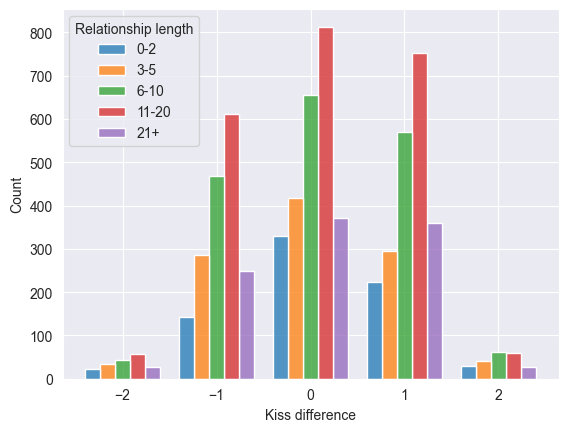

In [192]:

fig, ax = plt.subplots()
sns.histplot(
    data=df1, x="kiss_diff", hue="Relationship length",
    hue_order=hue_,
    multiple="dodge", discrete=True, shrink=.8
)
ax.set_xlabel("Kiss difference")

Text(0.5, 0, 'Hold difference')

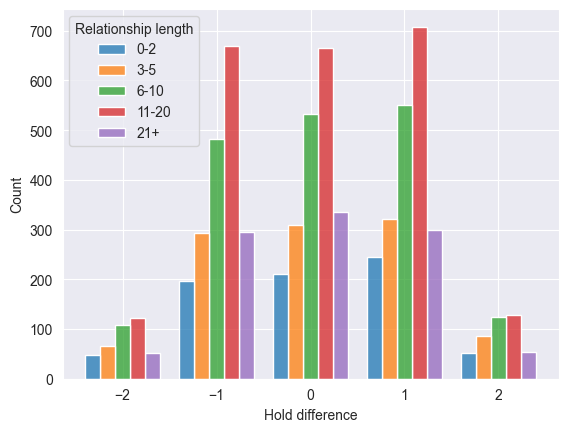

In [193]:
fig, ax = plt.subplots()
sns.histplot(
    data=df1, x="hold_diff", hue="Relationship length",
    hue_order=hue_,
    multiple="dodge", discrete=True, shrink=.8
)
ax.set_xlabel("Hold difference")

Text(0.5, 0, 'Hug difference')

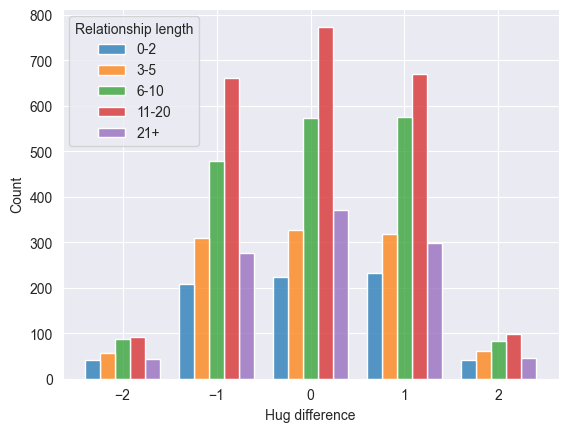

In [194]:
fig, ax = plt.subplots()
sns.histplot(
    data=df1, x="hug_diff", hue="Relationship length",
    hue_order=hue_,
    multiple="dodge", discrete=True, shrink=.8,
)
ax.set_xlabel("Hug difference")

Now lets focus on the Partner == Anchor match


Text(0.5, 0, 'Relationship satisfaction')

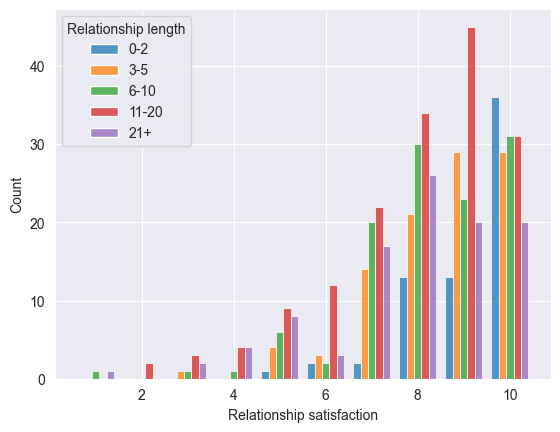

In [195]:
df_match = df1[(df1["kiss_diff"] == 0) & (df1["hold_diff"] == 0) & (df1["hug_diff"] == 0)]

fig, ax = plt.subplots()
sns.histplot(
    data=df_match, x="relsat",
    hue="Relationship length", hue_order=hue_,
    multiple="dodge", discrete=True, shrink=.8,
)
ax.set_xlabel("Relationship satisfaction")

In [196]:
df_kiss = df1[df1["kiss_diff"] == 0]
df_hold = df1[df1["hold_diff"] == 0]
df_hug = df1[df1["hug_diff"] == 0]

Text(0.5, 0, 'Kiss frequency')

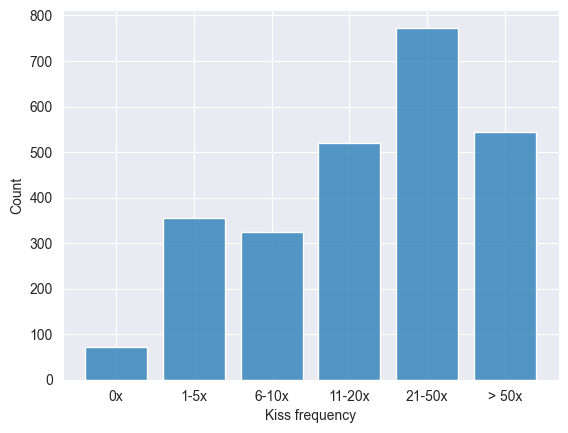

In [197]:
df_kiss['tf_kiss'] = pd.Categorical(df_kiss['tf_kiss'], ["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"],
                                    ordered=True)
df_kiss = df_kiss.sort_values("tf_kiss")

fig, ax = plt.subplots()
sns.histplot(
    data=df_kiss, x="tf_kiss",
    multiple="dodge", discrete=True, shrink=.8,
)
ax.set_xlabel("Kiss frequency")

In [198]:
# Group and get mean of numeric coverage per age
frequency_map = {
    "0x": 0,
    "1-5x": 3,
    "6-10x": 8,
    "11-20x": 15,
    "21-50x": 35,
    "> 50x": 60
}

In [199]:
kiss_match = df_hold["tf_kiss"].value_counts()

df_kiss["Kiss"] = df["tf_kiss"].map(frequency_map)
df_kiss = df_kiss.groupby("age")["Kiss"].mean().reset_index()


In [200]:
hold_match = df_hold["tf_hold"].value_counts()

df_hold["Hold"] = df["tf_hold"].map(frequency_map)
df_hold = df_hold.groupby("age")["Hold"].mean().reset_index()


In [201]:
hug_match = df_hug["tf_hug"].value_counts()

df_hug["Hug"] = df["tf_hug"].map(frequency_map)
df_hug = df_hug.groupby("age")["Hug"].mean().reset_index()


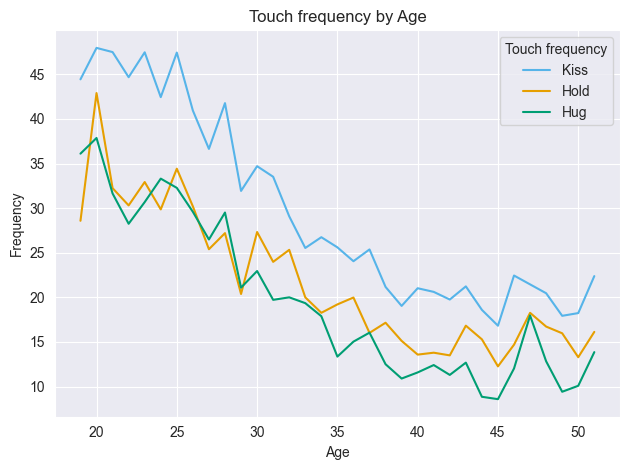

In [203]:
# fig, ax = plt.subplots()
# sns.lineplot(data=df_kiss, x="age", y="tf_kiss_num", color="red", linewidth=2)
# sns.lineplot(data=df_hold, x="age", y="tf_hold_num", color="blue", linewidth=2)
# sns.lineplot(data=df_hug, x="age", y="tf_hug_num", color="green", linewidth=2)
# ax.set_xlabel("Age")
# ax.set_ylabel("Frequency")
# plt.legend(title="Touch Frequency", loc="upper right", labels=['Kiss', 'Hold', 'hugh'])
# plt.show()

df_merged = pd.merge(df_kiss, df_hold, on="age", how="outer")
df_merged = pd.merge(df_merged, df_hug, on="age", how="outer")

df_long = pd.melt(df_merged, id_vars="age", var_name="Touch frequency", value_name="value")
# Plot
sns.lineplot(data=df_long, x="age", y="value", hue="Touch frequency", palette=["#56B4E9", "#E69F00", "#009E73"])
plt.title("Touch frequency by Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()